**imports**

In [1]:
from nltk.corpus import brown
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from itertools import chain

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mmdee\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
nltk.corpus.brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

# 3.1 Sub-activity: Loading the Brown corpus data from NLTK

**Task1**

In [4]:
category_names_list = brown.categories()
category_names_list.sort()
print(category_names_list)

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


**Task 2:**


(a) Add five columns to the dataframe

In [5]:
brown_corpus = pd.DataFrame(columns=['category_name', 'count_words','count_sentences', 'count_paragraphs',
                                     'common_words','common_words_after_preprocessing'])

In [6]:
brown_corpus['category_name'] = category_names_list
stopwords = nltk.corpus.stopwords.words('english')

(b) Fill this dataframe

In [7]:
for i in range(len(category_names_list)) :
    brown_corpus['count_words'][i] = len(brown.words(categories = category_names_list[i]))
    brown_corpus['count_sentences'][i] =  len(brown.sents(categories = category_names_list[i]))
    brown_corpus['count_paragraphs'][i] =  len(brown.paras(categories = category_names_list[i]))
    word_list = brown.words(categories = category_names_list[i])
    word_list = [word.lower() for word in word_list]
    word_list = nltk.FreqDist(word_list).most_common(10)
    word_list = [word[0] for word in word_list]
    brown_corpus['common_words'][i] = word_list

In [8]:
brown_corpus

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']",NaN
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]",NaN
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]",NaN
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]",NaN
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]",NaN
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]",NaN
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']",NaN
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]",NaN
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]",NaN
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]",NaN


(c) Add a sixth column to the dataframe named common words after preprocessing

In [9]:

for i in range(len(category_names_list)) :
    word_list = brown.words(categories = category_names_list[i])
    word_list = [word.lower() for word in word_list]  
    word_list = nltk.FreqDist(w for w in word_list if w not in stopwords and w not in string.punctuation and w not in [ '--', '``', "''"]) 
    word_list = word_list.most_common(10)
    word_list = [word[0] for word in word_list]
    brown_corpus['common_words_after_preprocessing'][i] = word_list


(d) Print the first ten rows of the final dataframe.

In [10]:
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[said, would, one, back, man, could, like, tim..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, mr., united, may, people, am..."
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[would, said, one, could, like, man, back, tim..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, year, states, may, united, new, develo..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[one, new, may, time, first, many, two, also, ..."
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[said, one, would, time, even, like, mr., coul..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[af, one, may, would, two, first, 1, also, tim..."
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo..."
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[said, would, one, back, could, like, man, get..."


# 3.2.1 Stemming

**Task 3:**

a) Remove stopwords and punctuation from the list of words of category news 


In [11]:

news_word_withstopword = brown.words(categories = 'news')
news_word_withstopword = [word.lower() for word in news_word_withstopword ]
news_words = []
for word in news_word_withstopword  :
    if word.lower() not in stopwords:
        news_words.append(word)

# remove punctuations 

news_words = [word for word in news_words if word not in string.punctuation and word not in [ '--', '``', "''"]]



#(b)Calculate and print the number of unique words in news words.

unique_words_news = set(news_words)
unique_words_news_length = len(unique_words_news)
print(unique_words_news_length)

#(c) apply the PorterStemmer

stemmer = PorterStemmer()

news_words_stem = [stemmer.stem(word) for word in unique_words_news]
news_words_stem = set(news_words_stem)
print(len(news_words_stem))


12954
9625


# Task 4:

In [12]:
#SnowballStemmer and the category fiction

fiction_word_withstopword = brown.words(categories = 'fiction')
fiction_word_withstopword = [word.lower() for word in fiction_word_withstopword ]
fiction_words = []
for word in news_word_withstopword  :
    if word.lower() not in stopwords:
        fiction_words.append(word)

# remove punctuations 

fiction_words = [word for word in fiction_words if word not in string.punctuation and word not in [ '--', '``', "''"]]



#Calculate and print the number of unique words in fiction words.

unique_words_fiction = set(fiction_words)
unique_words_fiction_length = len(unique_words_fiction)
print(unique_words_fiction_length)

#SnowballStemmer

stemmer_snowball = SnowballStemmer("english")
fiction_words_stem = [stemmer_snowball.stem(word) for word in unique_words_fiction]
fiction_words_stem = set(fiction_words_stem)
print(len(fiction_words_stem))

12954
9178


# 3.2.2 Lemmatization

# Task 5 : 

In [13]:
government_word_withstopword = brown.words(categories = 'government')
government_word_withstopword = [word.lower() for word in government_word_withstopword ]
government_words = []
for word in government_word_withstopword  :
    if word.lower() not in stopwords:
        government_words.append(word)

# Remove punctuations 

government_words = [word for word in government_words if word not in string.punctuation and word not in [ '--', '``', "''"]]



#Calculate and print the number of unique words in government words.
unique_words_government = set(government_words)
unique_words_government_length = len(unique_words_government)
print(unique_words_government_length) # printing unique words before Lemmatization

#Lemmatization

wnl = WordNetLemmatizer()
government_words_lem = [wnl.lemmatize(word) for word in unique_words_government]
government_words_lem = set(government_words_lem)
print(len(government_words_lem))    # printing unique words after Lemmatization


7223
6431


# 3.2.3 Finding synonyms and antonyms

**Task 6:**

In [14]:
#(a) First, add two new columns to the brown corpus dataframe: synonyms, antonyms.

brown_corpus = brown_corpus.reindex(columns = brown_corpus.columns.tolist() + ['synonyms','antonyms'])

In [47]:
def find_synonyms(keyword) :

    synonyms = []
    for synset in wn.synsets(keyword):
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def find_antonyms(keyword):
    antonyms = []
    for synset in wn.synsets(keyword):
        for lemma in synset.lemmas():
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
    return antonyms
    


In [48]:
list_pre = brown_corpus['common_words_after_preprocessing']
#(b)
def get_synonyms(list_pre):
    syn = []
    for word in list_pre:
        syn_list = find_synonyms(word)
        for a in syn_list:
            syn.append(a)
    return syn

#(c)
def get_antonyms(list_pre):
    ant = []
    for word in list_pre:
        ant_list = find_antonyms(word)
        for a in ant_list:
            ant.append(a)
    return ant

    
for i in range(len(brown_corpus['common_words_after_preprocessing'])):
    brown_corpus['synonyms'][i] = get_synonyms(brown_corpus['common_words_after_preprocessing'][i])
    
for i in range(len(brown_corpus['common_words_after_preprocessing'])):
    brown_corpus['antonyms'][i] = get_antonyms(brown_corpus['common_words_after_preprocessing'][i])                    

<ipython-input-48-6ebf49e8da80>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brown_corpus['synonyms'][i] = get_synonyms(brown_corpus['common_words_after_preprocessing'][i])
<ipython-input-48-6ebf49e8da80>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brown_corpus['antonyms'][i] = get_antonyms(brown_corpus['common_words_after_preprocessing'][i])
C:\Users\mmdee\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [19]:
#(d)Print the first ten rows of the dataframe.

brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[said, would, one, back, man, could, like, tim...",None,NaN
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,...",None,NaN
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, mr., united, may, people, am...",None,NaN
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[would, said, one, could, like, man, back, tim...",None,NaN
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, year, states, may, united, new, develo...",None,NaN
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[one, new, may, time, first, many, two, also, ...",None,NaN
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[said, one, would, time, even, like, mr., coul...",None,NaN
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[af, one, may, would, two, first, 1, also, tim...",None,NaN
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo...",None,NaN
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[said, would, one, back, could, like, man, get...",None,NaN


# 3.2.4 Bigrams and trigrams

**Task 7:**

In [20]:
brown_paras = brown.paras()[-500:]
brown_paras

[[['Phil', 'turned', 'and', 'left', 'the', 'room', ',', 'hearing', 'Eddie', 'say', ':', '``', 'Someday', "you'll", 'see', 'I', 'was', 'right', "''", '.']], [['Phil', 'shut', 'the', 'door', 'behind', 'him', '.'], ['Outside', 'in', 'the', 'dressing', 'room', ',', 'Frankie', 'Ricco', 'sat', 'on', 'the', 'bench', 'dressed', 'in', 'his', 'street', 'clothes', '.']], ...]

**Task:8**

In [77]:
def get_bigrams_frequency(para_list) : 
    #considering the bigrams between paragaphs and between lines
    dict1 = {}
    line_list = []
    
    for para in para_list : 
        for line in para:
            line = [word for word in line if word not in stopwords and word  not in string.punctuation and word not in [ '--', '``', "''"]] 
            for word in line:
                line_list.append(word)
    
    bigrm = nltk.bigrams(line_list)
    bigrm_freq = nltk.FreqDist(bigrm)
    dict1.update(bigrm_freq)
    return dict1
    
    
        
    

**Task: 9**

In [79]:
brown_bigrams = get_bigrams_frequency(brown.paras()[-500:])

**Task: 10**

In [81]:
sorted( brown_bigrams.items() , key = lambda item : item[1] , reverse = True)[0:14]

[(('United', 'States'), 16),
 (('He', 'said'), 14),
 (('The', 'President'), 11),
 (('last', 'year'), 11),
 (('per', 'cent'), 10),
 (('White', 'House'), 10),
 (('said', 'The'), 9),
 (('Mr.', 'Hawksley'), 9),
 (('jury', 'said'), 8),
 (('President', 'Kennedy'), 8),
 (('tax', 'bill'), 8),
 (('social', 'security'), 7),
 (('Hawksley', 'said'), 7),
 (('home', 'rule'), 7)]

# 3.3.1 Barplots


Task 11:

In [82]:
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[said, would, one, back, man, could, like, tim...","[state, say, tell, allege, aver, say, suppose,...","[front, front, advance, front, veer, front, fo..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, woman, civilian, woman, odd, uneve..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, mr., united, may, people, am...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, divide, disunify, divided]"
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[would, said, one, could, like, man, back, tim...","[state, say, tell, allege, aver, say, suppose,...","[dislike, unlike, unlike, unalike, woman, civi..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, year, states, may, united, new, develo...","[state, province, state, state, state, nation,...","[divide, disunify, divided, old, worn, devolut..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[one, new, may, time, first, many, two, also, ...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, middle, last, second, few, evil, e..."
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[said, one, would, time, even, like, mr., coul...","[state, say, tell, allege, aver, say, suppose,...","[odd, uneven, dislike, unlike, unlike, unalike]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[af, one, may, would, two, first, 1, also, tim...","[one, 1, I, ace, single, unity, one, one, 1, i...","[middle, last, second]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, middle, last, second, few]"
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[said, would, one, back, could, like, man, get...","[state, say, tell, allege, aver, say, suppose,...","[front, front, advance, front, veer, front, fo..."


<BarContainer object of 15 artists>

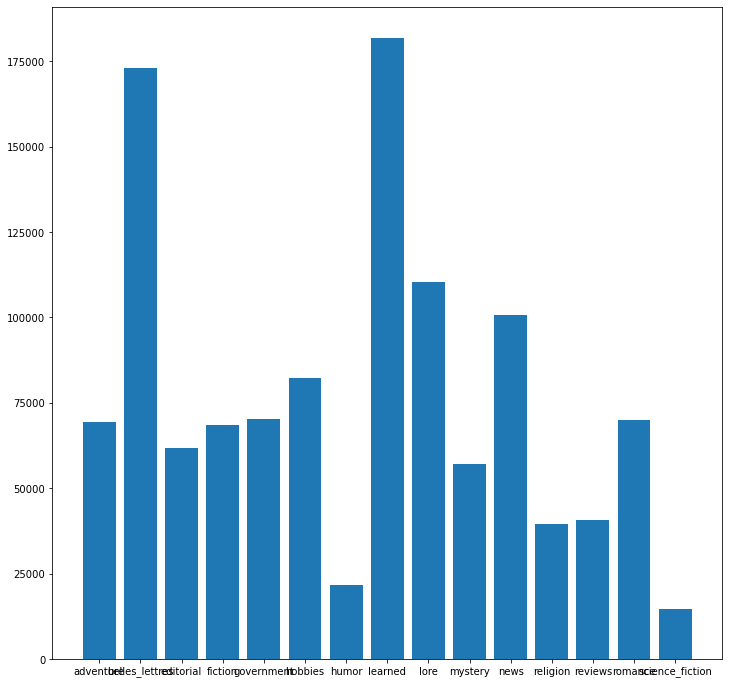

In [88]:
#Number of words 
plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus['category_name'], height=brown_corpus['count_words'])
plt.title("Number of words per category")

Text(0.5, 1.0, 'Number of sentences per category')

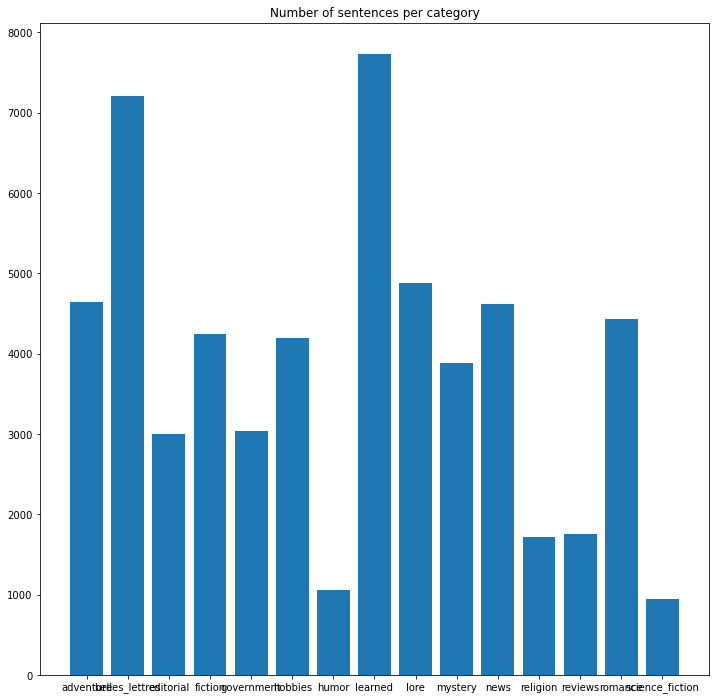

In [89]:
#Number of lines 
plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus['category_name'], height=brown_corpus['count_sentences'])

plt.title("Number of sentences per category")

Text(0.5, 1.0, 'Number of paragraphs per category')

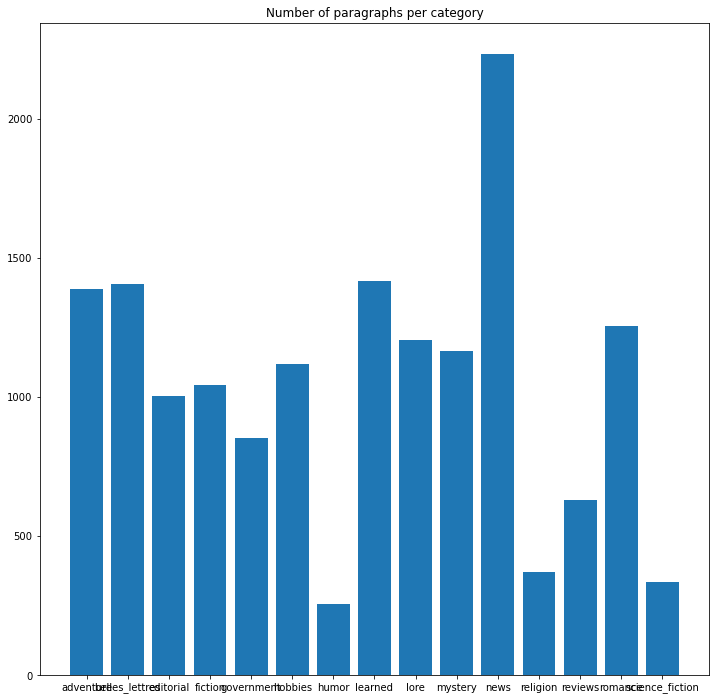

In [90]:
#Number of paragraphs
plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus['category_name'], height=brown_corpus['count_paragraphs'])

plt.title("Number of paragraphs per category")

**Task 12:**

No handles with labels found to put in legend.


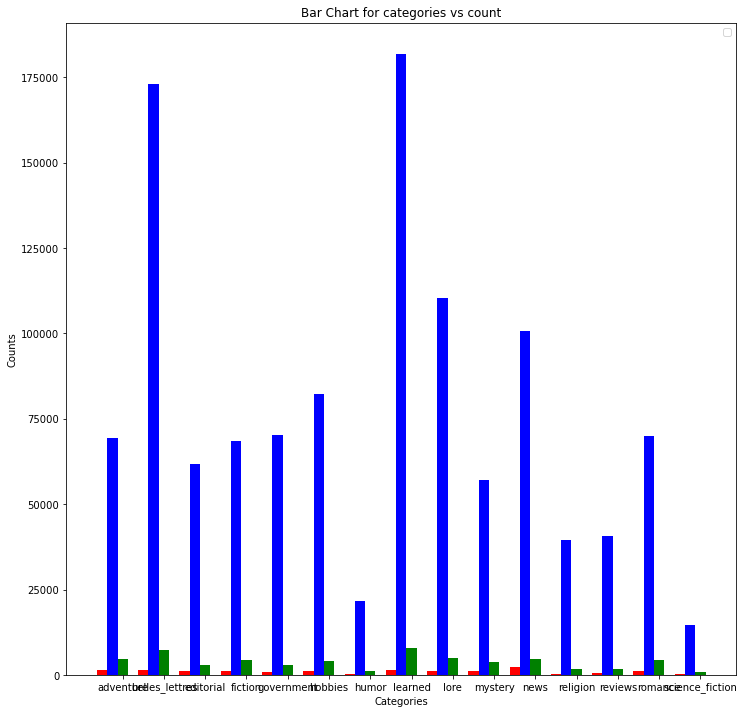

In [103]:
plt.figure(figsize=(12,12))
x = brown_corpus['category_name']
y = brown_corpus['count_words']
y1 = brown_corpus['count_paragraphs']
y2 = brown_corpus['count_sentences']

X_axis = np.arange(len(x))*2
ax = plt.subplot(111)
ax.bar(X_axis- 0.5, y, width=0.5, color='b', align='center')
ax.bar(X_axis, y2, width=0.5, color='g', align='center')
ax.bar(X_axis -1, y1, width=0.5, color='r', align='center')

plt.xticks(X_axis, x)
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Bar Chart for categories vs count")
plt.legend()

plt.show()



Task 13:

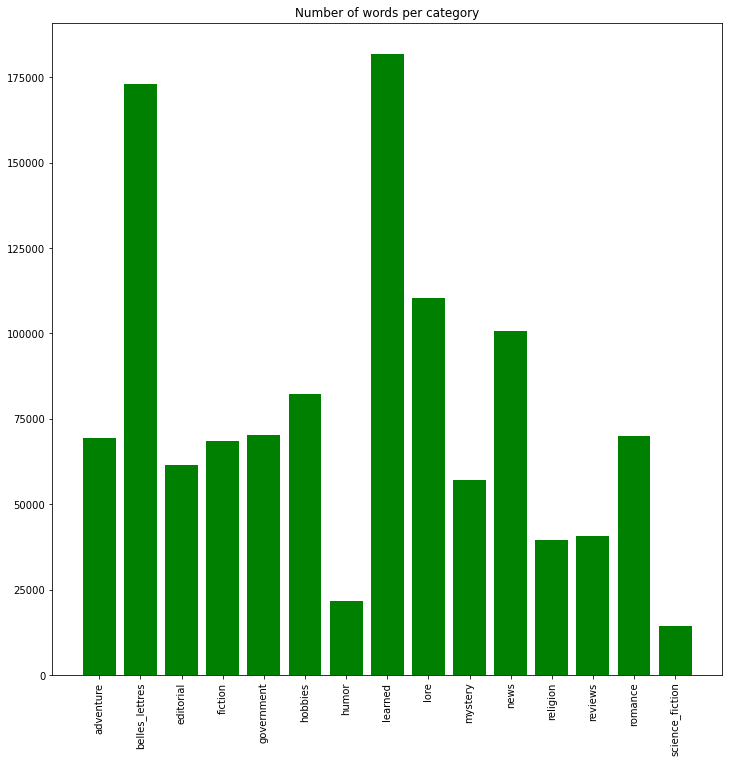

In [102]:
#Number of words  change color
plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus['category_name'], height=brown_corpus['count_words'] , color = 'g')
plt.title("Number of words per category")


# Adjust x-axes labels for all barplots by rotating them by 90 degrees clockwise.

plt.xticks(rotation=90)


plt.show()

<BarContainer object of 15 artists>

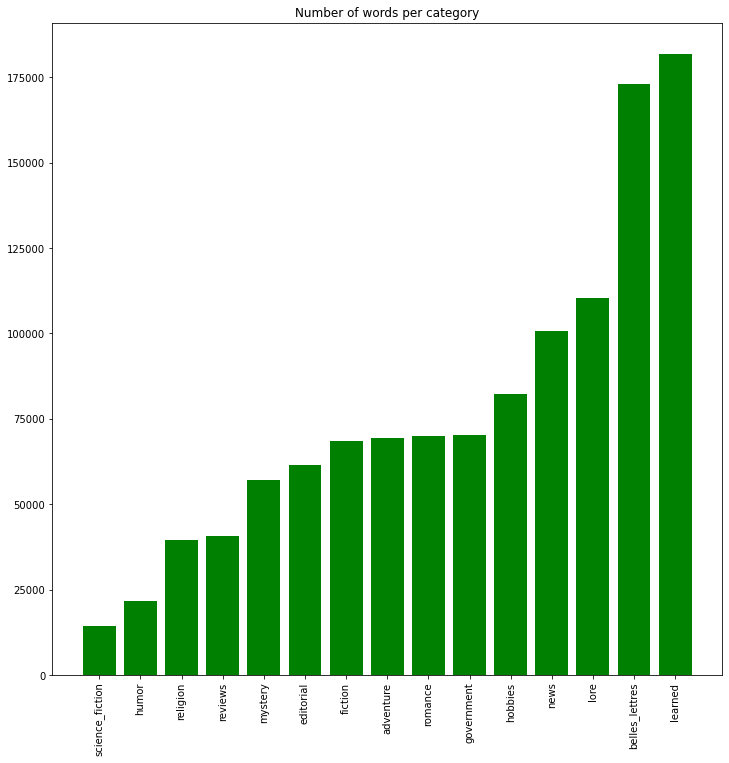

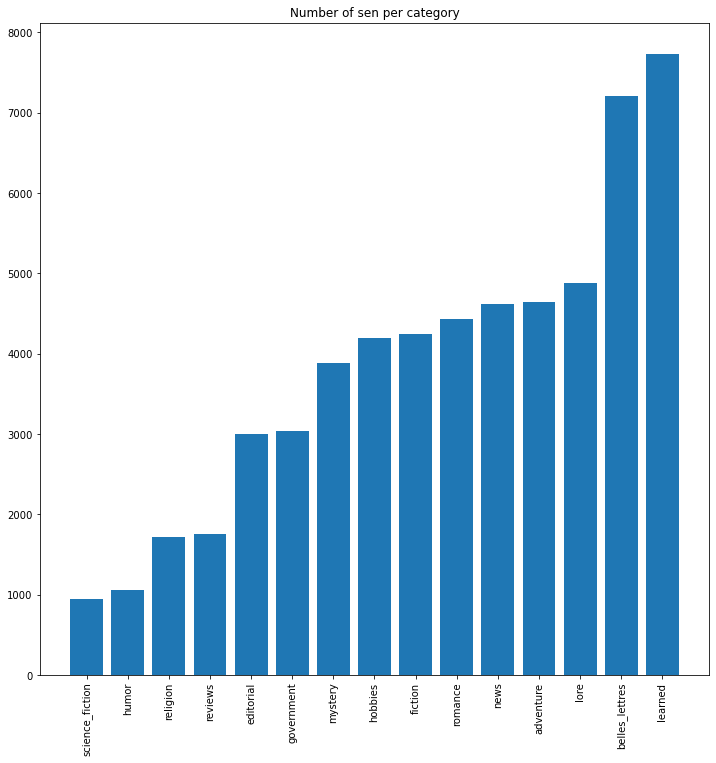

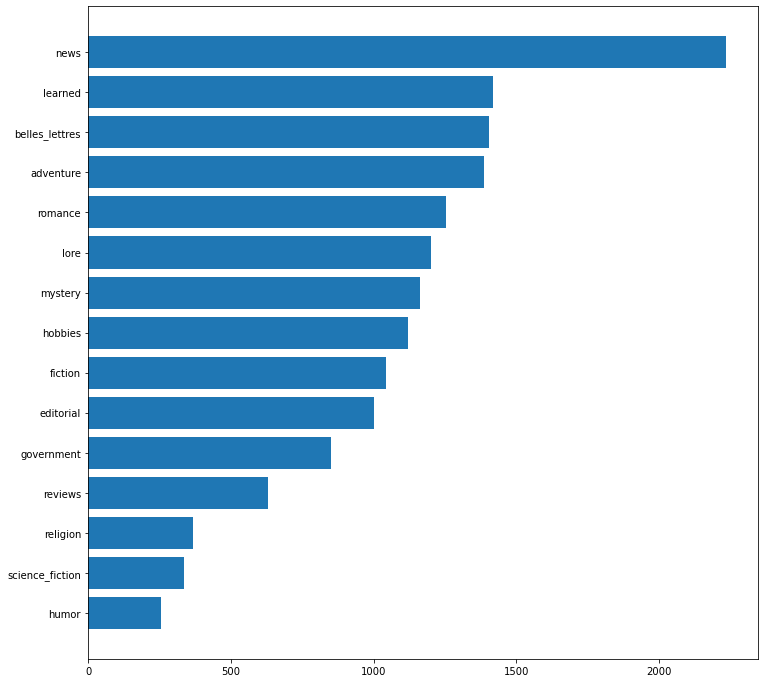

In [122]:
#• Order the bars for each plot in ascending order, e.g. the smallest bar is the first one from the left.

brown_corpus_words = brown_corpus[["category_name", "count_words" ]]

brown_corpus_words = brown_corpus_words.sort_values(by=['count_words'])

plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus_words['category_name'], height=brown_corpus_words['count_words'] , color = 'g')
plt.title("Number of words per category")
plt.xticks(rotation=90)



brown_corpus_sen = brown_corpus[["category_name", "count_sentences" ]]

brown_corpus_sen = brown_corpus_sen.sort_values(by=['count_sentences'])

plt.figure(figsize=(12,12))
plt.bar(x=brown_corpus_sen['category_name'], height=brown_corpus_sen['count_sentences'] )
plt.title("Number of sen per category")
plt.xticks(rotation=90)

#Replace the 3rd barplot by a horizontal barplot with the categories displayed on the y-axis. Sort the bars in ascending order from top to bottom. 

plt.figure(figsize=(12,12))
plt.barh(y=brown_corpus_para['category_name'], width=brown_corpus_para['count_paragraphs'] )